<h2>Gender Voice Recognition Prediction </h2>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('python/voice.csv')

In [4]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
df.shape

(3168, 21)

In [6]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [7]:
df['label'].value_counts(dropna= True)

female    1584
male      1584
Name: label, dtype: int64

In [8]:
#checking out for correlations 
df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


In [9]:
#checking whether there is any null values 
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [10]:
df.shape

(3168, 21)

In [11]:
print('Total number of labels {}'.format(df.shape[1]))
print('Total number of males {}'.format(df['label'].value_counts()['male']))
print('Total number of females {}'.format(df['label'].value_counts()['female']))


Total number of labels 21
Total number of males 1584
Total number of females 1584


In [12]:
#seperating features and labels 
X = df.drop('label', axis = 1).values
y = df['label'].values

In [14]:
X.shape, y.shape

((3168, 20), (3168,))

In [15]:
y

array(['male', 'male', 'male', ..., 'female', 'female', 'female'],
      dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit(y).transform(y)

In [17]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [18]:
#import all the necessary classifers both liner svc and non-liner svc 
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

In [19]:
#plot the decision boundary 
classifiers = [LinearSVC(), SVC(), LogisticRegression()]

C:\Users\Theophine\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


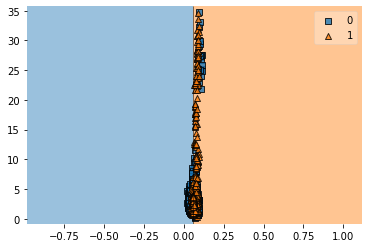

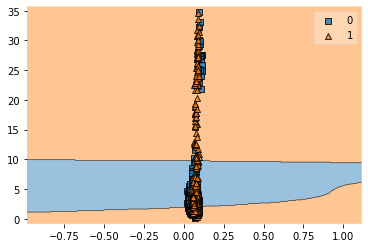

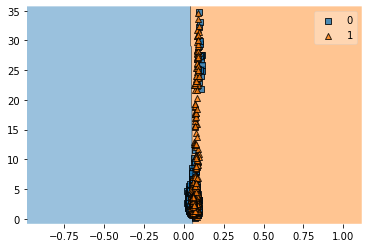

In [20]:
for c in classifiers: 
    c.fit(X[:, [1, 6]], y)
    plot_decision_regions(X[:, [1, 6]], y, c)
    plt.show()


<h2> From the above decision boundary plots, it definitely looks like a job for a non linear svc</h2>

<h3>lets run the SVM with default hyperparameters </h3>

In [21]:
#standardize your data
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.metrics import make_scorer, f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, plot_confusion_matrix, plot_roc_curve, classification_report, roc_curve, roc_auc_score


In [22]:
#split the data using train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2534, 20), (634, 20), (2534,), (634,))

In [24]:
#using default hyperparameters 
svc = SVC(random_state = 0, probability = True)

In [25]:
svc.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [26]:
scorer = make_scorer(f1_score, average = 'weighted')

In [27]:
#instantiate all the necessary parameters
steps = [('scaler', StandardScaler()), ('impute', SimpleImputer(missing_values= np.nan, strategy= 'mean')),
        ('best_feature', SelectKBest(f_classif)),  ('classifier', svc)]

In [28]:
pipeline = Pipeline(steps)

In [29]:
params = [{'best_feature__k': np.arange(1, 19), 'classifier__C': np.arange(0.01, 1, 0.1), 'classifier__kernel': ['rbf'], 'classifier__gamma': np.arange(0.01, 1.5, 0.1)},
         {'best_feature__k': np.arange(1, 19), 'classifier__C': np.arange(0.01, 1, 0.1), 'classifier__kernel': ['poly'], 'classifier__degree': np.arange(0, 10, 1)}]

In [30]:
search = GridSearchCV(pipeline, param_grid = params, cv = 2, scoring = scorer)

In [31]:
searcher = search.fit(X_train, y_train)

In [33]:
import pickle

In [34]:
#save the model the local drive for later use
with open('python/models/svm_gender_voice_practice.pkl', 'wb') as file:
    pickle.dump(searcher, file)

In [35]:
#bring back the file for prediction 

In [36]:
with open('python/models/svm_gender_voice_practice.pkl', 'rb') as file:
    model = pickle.load(file)

In [37]:
model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('impute', SimpleImputer()),
                ('best_feature', SelectKBest(k=13)),
                ('classifier',
                 SVC(C=0.91, gamma=0.41000000000000003, probability=True,
                     random_state=0))])

In [38]:
model.best_params_

{'best_feature__k': 13,
 'classifier__C': 0.91,
 'classifier__gamma': 0.41000000000000003,
 'classifier__kernel': 'rbf'}

In [39]:
y_pred_proba = model.predict_proba(X_test)[:]


In [40]:
[s[1] > 0.6 for s in y_pred_proba] == model.predict(X_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, [s[1] > 0.6 for s in y_pred_proba])

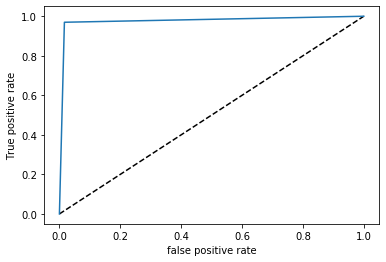

In [42]:
plt.plot([0, 1], [0,1], 'k--')
plt.plot(fpr, tpr, label = 'Roc Curve')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.show()

In [43]:
print('the AUC is {}'.format(roc_auc_score(y_test, [s[1] > 0.6 for s in y_pred_proba])))

the AUC is 0.9766057102994669


In [44]:
print('recall score is {}'.format(recall_score(y_test, [s[1] > 0.6 for s in y_pred_proba])))
print('precision score is {}'.format(precision_score(y_test, [s[1] > 0.6 for s in y_pred_proba])))

recall score is 0.9696048632218845
precision score is 0.9845679012345679


<Figure size 648x504 with 0 Axes>

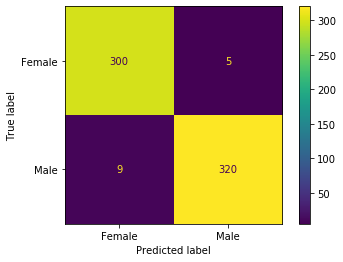

In [54]:
plt.figure(figsize = (9, 7));
plot_confusion_matrix(model, X_test, y_test, display_labels= ['Female', 'Male']);

In [51]:
print(classification_report(y_test, [s[1] > 0.6 for s in y_pred_proba]))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       305
           1       0.98      0.97      0.98       329

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

